In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [1]:
cd yolov5

c:\Users\Zidan\Documents\yolov5


In [2]:
%pip install -r requirements.txt

  Using cached GitPython-3.1.40-py3-none-any.whl.metadata (12 kB)
  Using cached matplotlib-3.8.2-cp310-cp310-win_amd64.whl.metadata (5.9 kB)
  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached Pillow-10.1.0-cp310-cp310-win_amd64.whl.metadata (9.6 kB)
  Using cached scipy-1.11.4-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached torch-2.1.2-cp310-cp310-win_amd64.whl.metadata (26 kB)
  Using cached torchvision-0.16.2-cp310-cp310-win_amd64.whl.metadata (6.6 kB)
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
  Using cached ultralytics-8.0.229-py3-none-any.whl.metadata (32 kB)
  Using cached pandas-2.1.4-cp310-cp310-win_amd64.whl.metadata (18 kB)
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached contourpy-1.2.0-cp310-cp310-win_amd64.whl.metadata (5.8 kB)
  Using cached cy

In [3]:
%pip install roboflow

  Using cached certifi-2023.7.22-py3-none-any.whl.metadata (2.2 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
  Using cached supervision-0.17.1-py3-none-any.whl.metadata (12 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Using cached python_magic-0.4.27-py2.py3-none-any.whl (13 kB)
   ---------------------------------------- 0.0/69.0 kB ? eta -:--:--
   ---------------------------------------- 69.0/69.0 kB 1.9 MB/s eta 0:00:00
Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
Using cached opencv_python_headless-4.8.0.74-cp37-abi3-win_amd64.whl (38.0 MB)
Using cached supervision-0.17.1-py3-none-any.whl (77 kB)
  Attemptin

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
import uuid
import time

In [4]:
import torch
import os
import glob
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.1.2+cu121 (NVIDIA GeForce GTX 1650)


In [19]:
from roboflow import Roboflow
rf = Roboflow(api_key="t3mp0Vn5qkI8WypPO34V")
project = rf.workspace("yolo-6hrdo").project("facemask-xafme")
dataset = project.version(13).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to facemask-13 in yolov5pytorch:: 100%|██████████| 2412/2412 [00:01<00:00, 2273.57it/s]


In [ ]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

Train

In [5]:
!python train.py --img 640 --batch 16 --epochs 50 --data C:/Users/Zidan/Documents/yolov5/facemask-13/data.yaml --weights yolov5s6.pt --name yolov5s_results  --cache

train: weights=yolov5s6.pt, cfg=, data=C:/Users/Zidan/Documents/yolov5/facemask-13/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-253-g63555c8 Python-3.10.9 torch-2.1.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, o

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

Validate

In [37]:
!python val.py --weights C:/Users/Zidan/Documents/yolov5/runs/train/yolov5s_results/weights/best.pt --data C:/Users/Zidan/Documents/yolov5/facemask-6/data.yaml --img 640

val: data=C:/Users/Zidan/Documents/yolov5/facemask-6/data.yaml, weights=['C:/Users/Zidan/Documents/yolov5/runs/train/yolov5s_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-253-g63555c8 Python-3.10.9 torch-2.1.2+cpu CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning C:\Users\Zidan\Documents\yolov5\facemask-6\valid\labels.cache... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]
val: Scanning C:\Users\Zidan\Documents\yolov5\facemask-6\valid\labels.cache... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]

                 Class     Images  Instances          P          R      mAP50   mAP50-95: 

Test using detect.py

In [6]:
!python detect.py --source C:/Users/Zidan/Documents/yolov5/facemask-6/input.mp4 --weights C:/Users/Zidan/Documents/yolov5/runs/train/yolov5s_results5/weights/best.pt --data C:/Users/Zidan/Documents/yolov5/facemask-13/data.yaml --conf 0.2

^C


Load Trained Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='C:/Users/Zidan/Documents/yolov5/runs/train/yolov5s_results5/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Zidan/.cache\torch\hub\master.zip
YOLOv5  2023-12-31 Python-3.10.9 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 206 layers, 12315904 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 


In [15]:
img = os.path.join('C:/Users/Zidan/Documents/yolov5/facemask-6/train/images/incorrect-mask-101_jpg.rf.3e2008b0871d8353173b002f4b752f0b.jpg')

In [16]:
results = model(img)

In [17]:
results.print()

image 1/1: 640x640 1 mask_weared_incorrectly
Speed: 7.2ms pre-process, 17.8ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


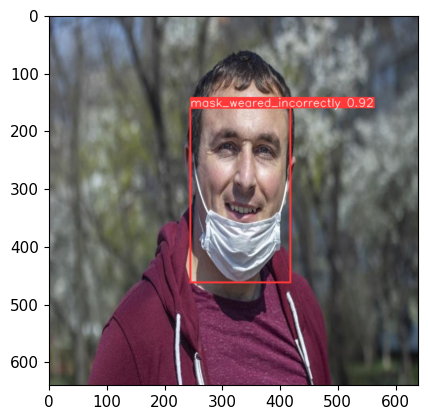

In [18]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

Test Real-Time

In [6]:
import cv2

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('Face Mask Detection', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Demo Application

In [4]:
%pip install streamlit torch torchvision opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [1]:
!streamlit run C:/Users/Zidan/Documents/app.py

^C
